In [ ]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        self.fc_layers = nn.Sequential(
            nn.Linear(128 * 28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            
        )
        
    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)  # Flatten the output from conv layers
        x = self.fc_layers(x)
        return x
    

In [9]:
# Data transformations (you might need to adjust these based on your dataset)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load data
train_data = datasets.ImageFolder(root='data/train/', transform=transform)
print(train_data.class_to_idx)
valid_data = datasets.ImageFolder(root='data/valid/', transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=32, shuffle=False)

# Initialize model, loss function, and optimizer
model = CNNModel()
loss_fn = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss with logits
optimizer = optim.Adam(model.parameters(), lr=0.001)


{'ethanol': 0, 'water': 1}
7


torch.Size([3, 224, 224])
tensor(0)
output: tensor([[-6.3755]])
prediction: tensor([[-6.]])
torch.Size([3, 224, 224])


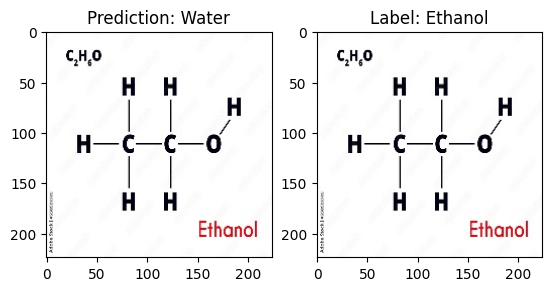

In [5]:

model.eval()
images_so_far = 0
fig, axs = plt.subplots(1,2)



with torch.no_grad():
    for i, (inputs, labels) in enumerate(valid_loader):
        for image,label in zip(inputs, labels):
            axs[0].imshow(image.permute(1,2,0))
            print(image.shape)
            print(label)
            ouput = model(image.unsqueeze(0))
            print(f"output: {ouput}")
            prediction = torch.round(ouput)
            print(f"prediction: {prediction}")
            prediction_label = 'Ethanol' if prediction == 0 else 'Water'
            axs[0].set_title(f"Prediction: {prediction_label}")

            correct_label = 'Ethanol' if label == 0 else 'Water'
            axs[1].imshow(image.permute(1,2,0))
            axs[1].set_title(f"Label: {correct_label}")
            
            
            
            print(image.shape)
            break
        break

            

